In [1]:
from Tester import Tester 
import robot_color_tracking as track
import numpy as np

# ["daylight", "night right bulb", "night center bulb", "night left bulb"]
# [1,1,1] * [1,1,1]
# [1,1,1] * [1,0,1]
# [1,1,1] * [1,0,1]

kernel = np.array([[0,1,1,1,0],[0,1,1,1,0], [1,1,1,1,1],[0,1,1,1,0], [0,1,1,1,0]])

detected = []
false_negative = []
false_positive = []
d_parameter = list(range(10, 70, 5))
for d in d_parameter:
    trackers = {
        'achromatic': track.AchromaticTrack(d=d,img_width=500, binaryThreshold= 40,hueTolerance=15,
                                            satTolerance=0, kernel = kernel, convolution=True,
                                            colors=['blue','cyan', 'red', 'yellow'])
    }

    tester = Tester(trackers=trackers,id_options=['red','green','blue', 'yellow'])
    tester.load_positions()
    tester.evaluate_error()





    # tester.save_error_and_time()

# tester = Tester(methods=['colors_naive', 'achromatic', 'hough_colors'],id_options=['red','springGreen','skyBlue','yellow'])
# tester.get_statistics_by_id()
#     tester.load_error(folder='')
# tester.load_positions()
# print(tester.positions_data)
# tester.evaluate_error()
# print(tester.error)
# tester.save_error_and_time()
# tester.get_statistics_by_id() # pos_data = tester.filter_place_methods(tester.positions_data, 'night center bulb'),
#                                err = tester.filter_place_methods(tester.error, 'night center bulb')
    statistics = tester.get_statistics_by_place()

    detected.append(0)
    false_negative.append(0)
    false_positive.append(0)
    for p in statistics['achromatic']:
        if(p != 'time'):
            detected[-1] += statistics['achromatic'][p]['detected']
            false_negative[-1] += statistics['achromatic'][p]['false_negative']
            false_positive[-1] += statistics['achromatic'][p]['false_positive']

    detected[-1] /= 4
    false_negative[-1] /= 4
    false_positive[-1] /= 4


    # filtered_id = tester.filter_id(tester.error['colors_naive'], 'red')
    # tester.get_only_error_id(filtered_id, 'red')
    # Resolver place_options

SyntaxError: invalid syntax (Tester.py, line 103)

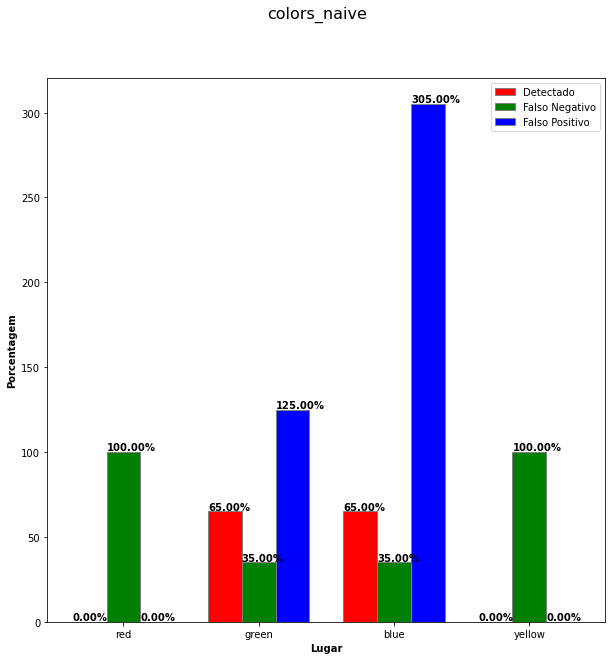

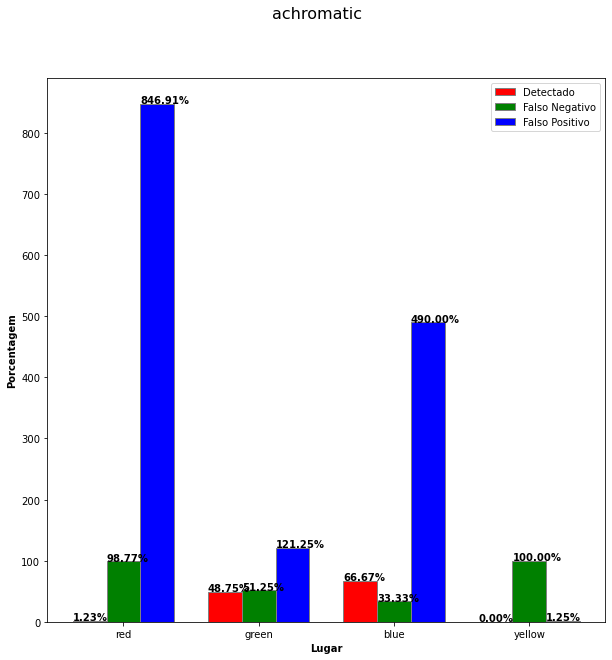

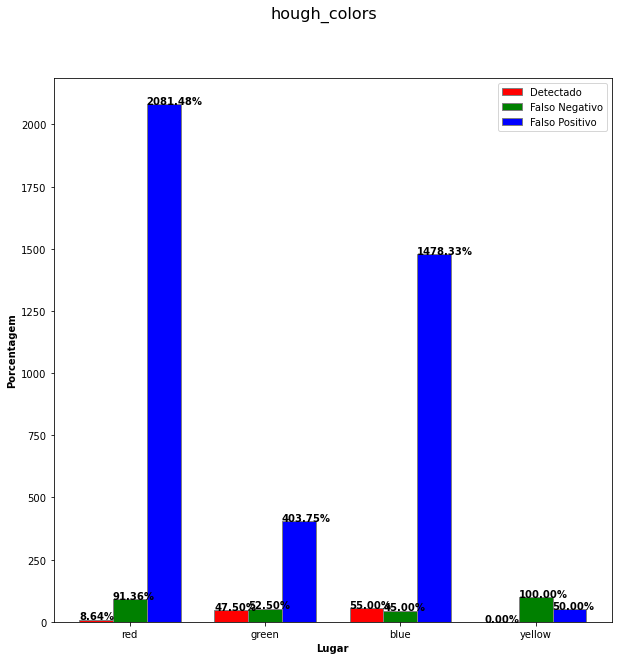

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

statistics = tester.statistics
controlled_variable = tester.id_options  #["daylight", "night right bulb", "night center bulb", "night left bulb"] 
methods = statistics
timeOfTrack = tester.timeOfTrack
# Gráfico com índices de detecção

for m in statistics:
    plt.figure(figsize=(10,10))
    axes = []
    axes.append(plt.bar(range(1, 4*len(controlled_variable), 4), [statistics[m][p]['detected'] for p in controlled_variable], color ='r', width =1, 
            edgecolor ='grey', label ='Detectado') )
    axes.append( plt.bar(range(2, 4*len(controlled_variable), 4), [statistics[m][p]['false_negative'] for p in controlled_variable], color ='g', width = 1, 
            edgecolor ='grey', label ='Falso Negativo') )
    axes.append( plt.bar(range(3, 4*len(controlled_variable), 4), [statistics[m][p]['false_positive'] for p in controlled_variable], color ='b', width = 1, 
            edgecolor ='grey', label ='Falso Positivo') )
    
    # Add annotation to bars
    for ax in axes:
        for i in ax.patches: 
            plt.text(i.xy[0], i.get_height()+1,  
                     str(format(i.get_height(), '.2f'))+'%', 
                     fontsize = 10, fontweight ='bold', 
                     color ='black') 
    # Adding Xticks
    plt.xlabel('Lugar', fontweight ='bold') 
    plt.ylabel('Porcentagem', fontweight ='bold') 
    plt.xticks(list(range(2, 4*len(controlled_variable), 4)),
               controlled_variable) 
    plt.suptitle(m, fontsize=16)
    plt.legend()
    try:
        plt.savefig('../algorithm_performance_data/graphs/25-2-2021-night right bulb/'+m+'_detections.png')
    except:
        os.system('mkdir ../algorithm_performance_data/graphs/25-2-2021-night\ right\ bulb/')
        plt.savefig('../algorithm_performance_data/graphs/25-2-2021-night right bulb/'+m+'_detections.png')
    
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


FileNotFoundError: [Errno 2] No such file or directory: '../algorithm_performance_data/graphs/23-2-2021-daylight/mean_error.png'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


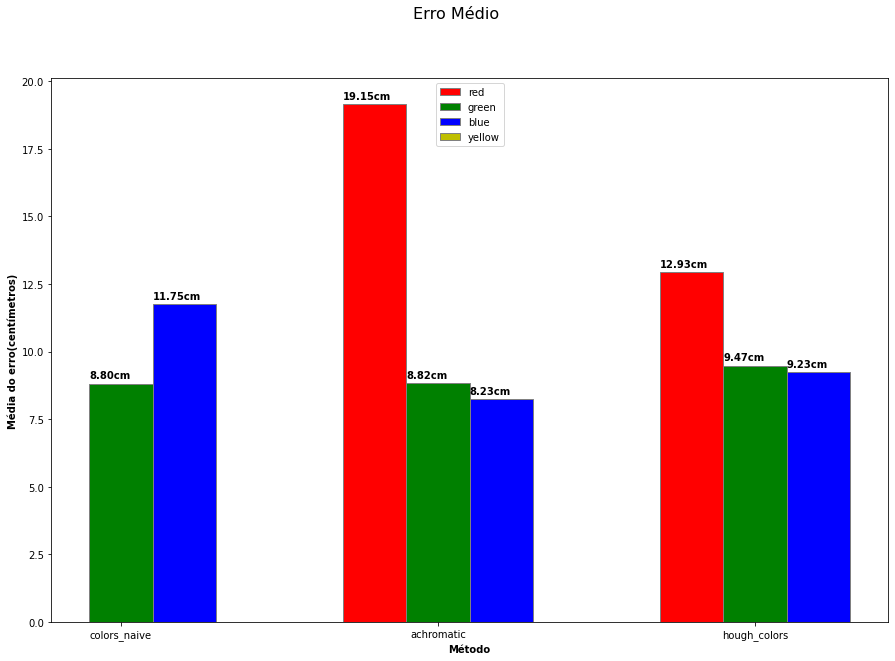

In [30]:
# Gráfico com distância média do local esperado

color = ['r', 'g', 'b', 'y']
label = controlled_variable
cm_per_px = 0.2
plt.figure(figsize=(15,10))
for i in range(len(label)):
    ax = plt.bar(range(i+1,5*len(methods),5),[ cm_per_px*statistics[m][label[i]]['distance_mean'] for m in methods],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])
    for i in ax.patches: 
        plt.text(i.xy[0], i.get_height()+0.2,  
                 str(format(i.get_height(), '.2f'))+'cm', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Média do erro(centímetros)', fontweight ='bold') 
plt.xticks([2+5*i for i in range(len(methods))], methods) 
plt.suptitle('Erro Médio', fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/23-2-2021-daylight/mean_error.png')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


FileNotFoundError: [Errno 2] No such file or directory: '../algorithm_performance_data/graphs/23-2-2021-daylight/standard_deviation.png'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


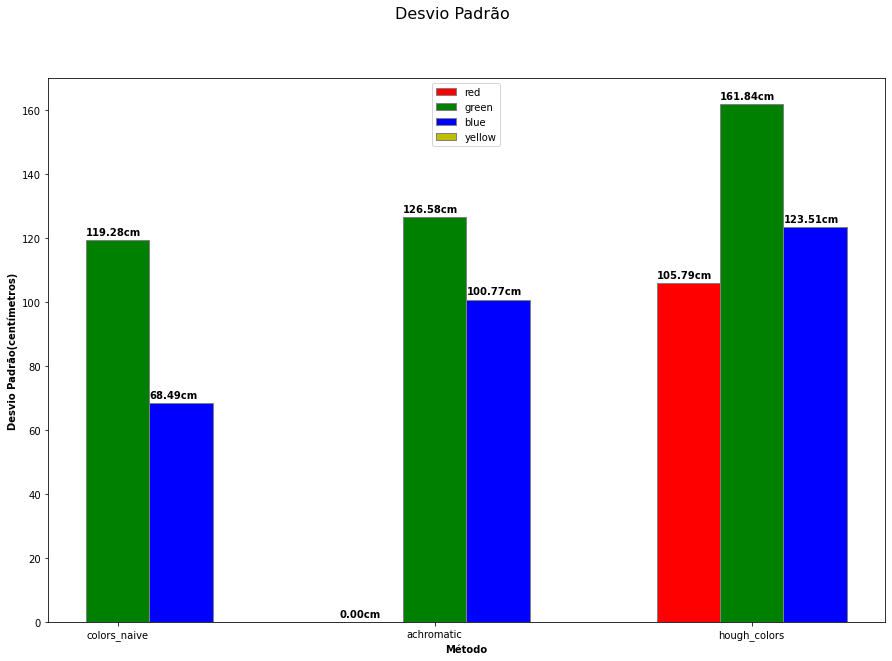

In [27]:
# Gráfico com desvio padrão da média

color = ['r', 'g', 'b', 'y']
label = controlled_variable

plt.figure(figsize=(15,10))
for i in range(len(label)):
    ax = plt.bar(range(i+1,5*len(methods),5),[ cm_per_px*statistics[m][label[i]]['distance_deviation'] for m in methods],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])
    for i in ax.patches: 
        plt.text(i.xy[0], i.get_height()+1.6,  
                 str(format(i.get_height(), '.2f'))+'cm', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Desvio Padrão(centímetros)', fontweight ='bold') 
plt.xticks([2+5*i for i in range(len(methods))], methods) 
plt.suptitle('Desvio Padrão', fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/23-2-2021-daylight/standard_deviation.png')
plt.show()

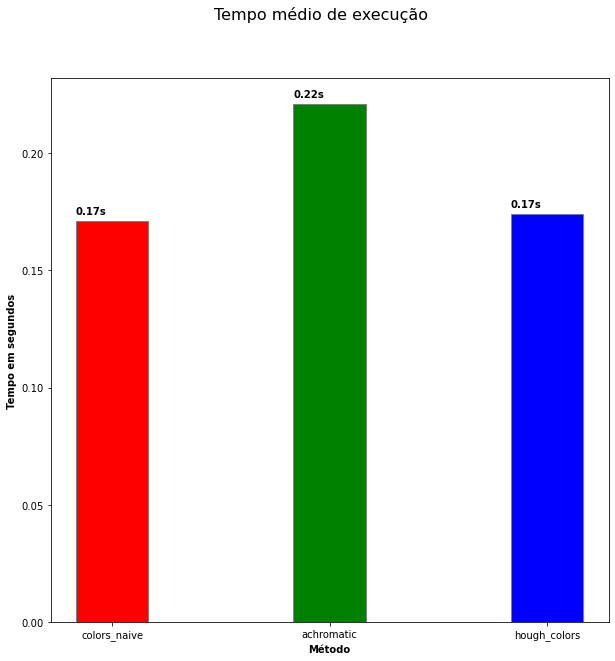

In [32]:
import matplotlib.pyplot as plt

# Tempo médio de execução
i=0
color = ['r', 'g', 'b', 'y', 'purple']
plt.figure(figsize=(10,10))
#methods = [ 'shapes_one_color','shapes','shapes_colors', 'colors_naive', 'colors']
#methods = ['colors_naive', 'hough_colors', 'achromatic']

for m in methods:
    ax = plt.bar(3*i,np.array(timeOfTrack[m]).mean(), color =color[i], width =1, edgecolor ='grey', label =m)
    for cont in ax.patches: 
        plt.text(cont.xy[0], cont.get_height()+0.003,  
                 str(format(cont.get_height(), '.2f'))+'s', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 
    i+=1

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Tempo em segundos', fontweight ='bold') 
plt.xticks(range(0,len(methods)*3, 3), 
           methods) 
plt.suptitle('Tempo médio de execução', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/23-2-2021-daylight/time.png')
plt.show()

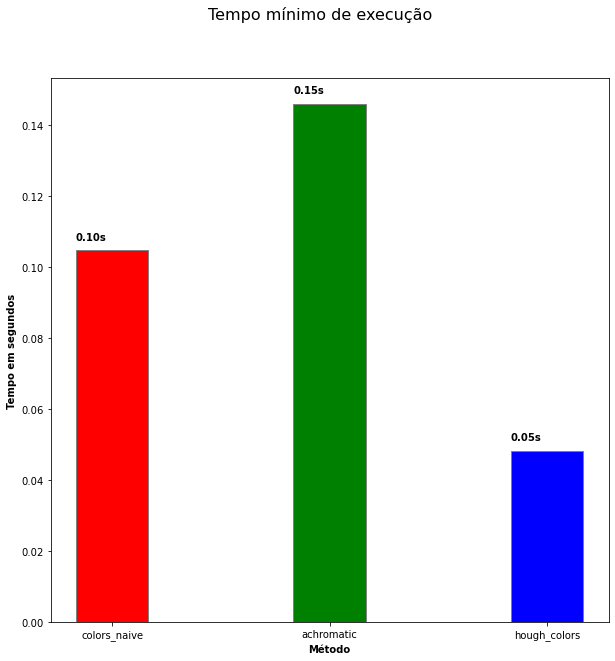

In [34]:
import matplotlib.pyplot as plt

# Tempo médio de execução
i=0
color = ['r', 'g', 'b', 'y', 'purple']
plt.figure(figsize=(10,10))
#methods = [ 'shapes_one_color','shapes','shapes_colors', 'colors_naive', 'colors']
#methods = ['colors_naive', 'hough_colors', 'achromatic']
for m in methods:
    ax = plt.bar(3*i,np.array(timeOfTrack[m]).min(), color =color[i], width =1, edgecolor ='grey', label =m)
    i+=1
    for cont in ax.patches: 
        plt.text(cont.xy[0], cont.get_height()+0.003,  
                 str(format(cont.get_height(), '.2f'))+'s', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Tempo em segundos', fontweight ='bold') 
plt.xticks(range(0,len(methods)*3, 3), 
           methods) 
plt.suptitle('Tempo mínimo de execução', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/23-2-2021-daylight/time_min.png')
plt.show()

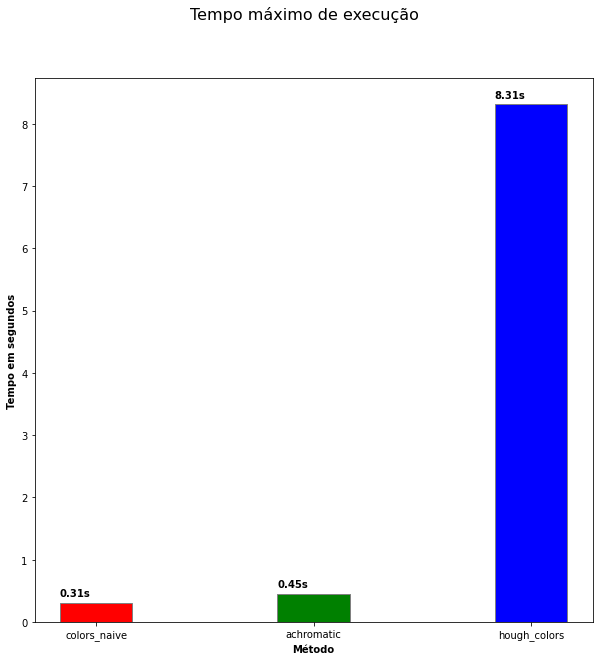

In [38]:
import matplotlib.pyplot as plt

# Tempo médio de execução
i=0
color = ['r', 'g', 'b', 'y', 'purple']
plt.figure(figsize=(10,10))
#methods = [ 'shapes_one_color','shapes','shapes_colors', 'colors_naive', 'colors']
#methods = ['colors_naive', 'hough_colors', 'achromatic']
for m in methods:
    ax = plt.bar(3*i,np.array(timeOfTrack[m]).max(), color =color[i], width =1, edgecolor ='grey', label =m)
    for cont in ax.patches: 
        plt.text(cont.xy[0], cont.get_height()+0.1,  
                 str(format(cont.get_height(), '.2f'))+'s', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 
    i+=1

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Tempo em segundos', fontweight ='bold') 
plt.xticks(range(0,len(methods)*3, 3), 
           methods) 
plt.suptitle('Tempo máximo de execução', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/23-2-2021-daylight/time_max.png')
plt.show()

In [19]:
import robot_color_tracking as track
import numpy as np

def calc_dist_error(calculated_positions, actual_positions):
    actual = np.array(actual_positions)
    calculated = np.array(calculated_positions)
    result = []
    false_negatives = 0

    for i in range(actual.size):
        if actual.size > 0 and calculated.size > 0:
            dist = calculated-actual[0]
            dist = np.sqrt(dist[:,0]**2+dist[:,1]**2)
            if(dist.min()<100):
                result.append(dist.min())
                calculated = np.delete(calculated, dist.argmin(), 0)
            else:
                false_negatives+=1
            actual = np.delete(actual, 0, 0)
        else:
            break

    false_positives = calculated.shape[0]
    false_negatives += actual.shape[0]

    return result, false_positives, false_negatives

trackers = {
    'achromatic': track.AchromaticTrack(d=30,img_width=500, binaryThreshold= 40,hueTolerance=15,
                                        satTolerance=0, kernel = np.ones((3,3)), convolution=True,
                                        colors=['blue','cyan', 'red', 'yellow'])
}

positions_data = tester.positions_data

data = positions_data['achromatic']

path = '../img/achromatic/'
counterProgress = 0
error={}
error['achromatic'] = {}
confusion_matrix = {'green': {'green': 0, 'blue': 0, 'red': 0, 'yellow': 0, 'false': 0},
                    'red' :  {'green': 0, 'blue': 0, 'red': 0, 'yellow': 0, 'false': 0},
                    'blue':  {'green': 0, 'blue': 0, 'red': 0, 'yellow': 0, 'false': 0},
                    'yellow':{'green': 0, 'blue': 0, 'red': 0, 'yellow': 0, 'false': 0},
                    'false': {'green': 0, 'blue': 0, 'red': 0, 'yellow': 0, 'false': 0},}
matrix_labels = ['green', 'blue', 'red', 'yellow']

# green_labeled_blue = 0
# blue_labeled_green = 0
# total = 0
m='acromatic'
for image in data:
    if(data[image]['place'] == 'night center bulb'):
    #     image ='IMG_20210108_134507.jpg'#'IMG_20210107_221450.jpg'
        print('\r'+'achromatic'+': '+str(format(100*counterProgress/len(data),'.2f'))+'%', end='')
#         print('##################'+image+'##################')
        gb_false_n = 0
        bg_false_n = 0
        # Track and store actual and calculated poses
        trackers['achromatic'].track(path+image)
        calc_poses = trackers['achromatic'].getPoses()
        actual_poses = data[image]["position"]
        if m == 'achromatic' or 'colors_naive' or 'hough_colors':
            calc_poses['green'] = calc_poses['cyan']
            del(calc_poses['cyan'])
#         print('')
#         print(calc_poses)
#         print('')
#         print(actual_poses)
#         print('')
        for calculated in matrix_labels:
            for actual in matrix_labels:
                if(actual in actual_poses):
                    green_labeled_red_list, fp, fn=calc_dist_error(calc_poses[calculated], actual_poses[actual])

                    confusion_matrix[calculated][actual] += len(green_labeled_red_list)

                    if(calculated == actual):
                        confusion_matrix['false'][actual] += fn
                        confusion_matrix[calculated]['false'] += fp
                    else:
                        confusion_matrix[calculated]['false'] -= len(green_labeled_red_list)

                elif(actual == calculated):
    #                 print(actual+' : '+str(len(calc_poses[actual])))
                    confusion_matrix[actual]['false'] += len(calc_poses[actual])
        
#         print(confusion_matrix)

        counterProgress+=1
        
print('\r'+'achromatic:'+format(100*counterProgress/len(data),'.2f')+'%')
# print('\n'+str(confusion_matrix))

achromatic:24.42%%


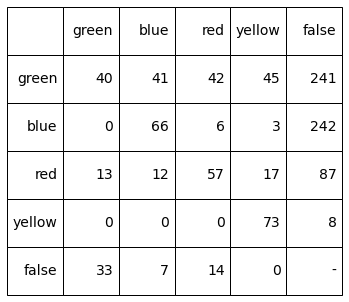

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

#define figure and axes
fig, ax = plt.subplots()

#create values for table
table_data=[['','green', 'blue', 'red', 'yellow','false'],
            ['green',confusion_matrix['green']['green'], confusion_matrix['green']['blue'], confusion_matrix['green']['red'], confusion_matrix['green']['yellow'],confusion_matrix['green']['false']],
            ['blue',confusion_matrix['blue']['green'], confusion_matrix['blue']['blue'], confusion_matrix['blue']['red'], confusion_matrix['blue']['yellow'],confusion_matrix['blue']['false']],
            ['red',confusion_matrix['red']['green'], confusion_matrix['red']['blue'], confusion_matrix['red']['red'], confusion_matrix['red']['yellow'],confusion_matrix['red']['false']],
            ['yellow',confusion_matrix['yellow']['green'], confusion_matrix['yellow']['blue'], confusion_matrix['yellow']['red'], confusion_matrix['yellow']['yellow'],confusion_matrix['yellow']['false']],
            ['false',confusion_matrix['false']['green'], confusion_matrix['false']['blue'], confusion_matrix['false']['red'], confusion_matrix['false']['yellow'],'-'],]

#create table
table = ax.table(cellText=table_data, loc='center')

#modify table
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')

#display table
plt.savefig('../algorithm_performance_data/graphs/night center bulb_confusion_matrix.png')
plt.show()